# LINEAR REGRESSION MODEL
- Linear regression is a type of supervised machine learning algorithm that computes the linear relationship between a dependent variable and one or more independent features.
- The goal of the algorithm is to find the best linear equation that can predict the value of the dependent variable based on the independent variables

# Assumption for Linear Regression Model
- **Linearity**: The independent and dependent variables have a linear relationship with one another. This implies that changes in the dependent variable follow those in the independent variable(s) in a linear fashion.
- **Independence**: The observations in the dataset are independent of each other. This means that the value of the dependent variable for one observation does not depend on the value of the dependent variable for another observation.
- **Homoscedasticity**: Across all levels of the independent variable(s), the variance of the errors is constant. This indicates that the amount of the independent variable(s) has no impact on the variance of the errors.
- **Normality**: The errors in the model are normally distributed.
- **No multicollinearity**: There is no high correlation between the independent variables. This indicates that there is little or no correlation between the independent variables.

# Purpose of the Project
- Exploratory data analysis (EDA) is one of the most significant methods which is conducted using various statistical and data visualization techniques to understand the structure and characteristics of the data before applying more complex modeling or hypothesis testing.
- Implementing Multiple Linear Regression on the dataset for future prediction.
- Regularization techniques used to address over-fitting
- Gradient Descent is an optimization algorithm is used to minimize the cost function as far as possible

# Life cycle of the Project
- Collect/Extract Data
- Preprocess the Data
- Divide data into Independent and Dependent Variable
- Split the data inti tarining and test data where training is for building linear regression model and predicting the test data.
- Build Model- Linear Regression Model
- Validate the test data

# Import Necessary Libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Import Dataset

In [2]:
df=pd.read_csv("insurance.csv")

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# Check and Remove duplicate rows

In [5]:
df.duplicated().sum()

1

In [6]:
#we got duplicated values in this dataset, so we have to remove one dulpiacted row

In [7]:
df.drop_duplicates(inplace=True)

# Dopping Non-Significant Columns:
- Here there is no non significant column, so no need to drop

# Data Preprocessing

### 1. Null Value Treatment

In [8]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
#No null values so no need to treat

### 2.Checking Outliers

In [10]:
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


In [11]:
df['bmi'].describe()

count    1337.000000
mean       30.663452
std         6.100468
min        15.960000
25%        26.290000
50%        30.400000
75%        34.700000
max        53.130000
Name: bmi, dtype: float64

In [12]:
df['children'].value_counts()

0    573
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [13]:
#This column does not need any outlier treatment

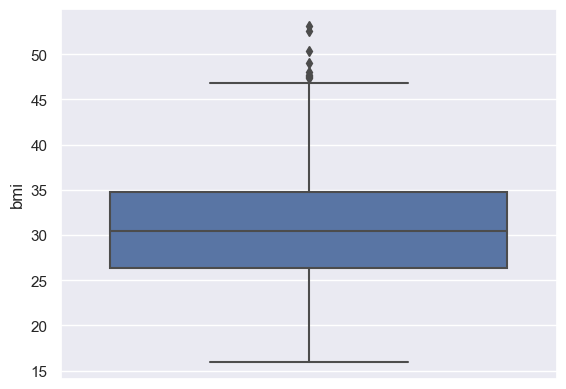

In [14]:
sns.boxplot(y='bmi', data= df)
plt.show()

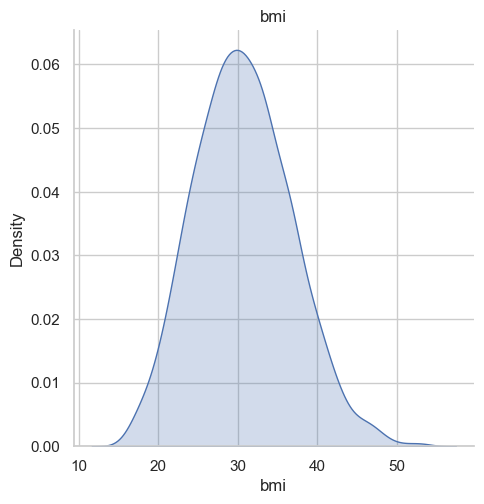

In [15]:
sns.set(style="whitegrid")  # Optional, sets the style of the plots
sns.displot(data=df, x='bmi', kind='kde', fill=True)
plt.title("bmi")
plt.show()

- So we need to do outlier treatment in this column

# ENCODING

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 115.9+ KB


In [17]:
df['sex'].value_counts()

male      675
female    662
Name: sex, dtype: int64

In [18]:
df['sex']= df['sex'].astype('category')
df['sex']= df['sex'].cat.codes

In [19]:
df['smoker'].value_counts()

no     1063
yes     274
Name: smoker, dtype: int64

In [20]:
df['smoker']= df['smoker'].astype('category')
df['smoker']= df['smoker'].cat.codes

In [21]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    324
northeast    324
Name: region, dtype: int64

In [22]:
df=pd.get_dummies( df,columns=['region'])


In [23]:
df= df.drop(['region_northeast'],axis=1)

In [24]:
df.head()

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,1
1,18,1,33.770,1,0,1725.55230,0,1,0
2,28,1,33.000,3,0,4449.46200,0,1,0
3,33,1,22.705,0,0,21984.47061,1,0,0
4,32,1,28.880,0,0,3866.85520,1,0,0


# Treating Outliers
- Only for bmi column

In [25]:
new_df=df.copy()

In [26]:
bmi_q1=new_df['bmi'].quantile(0.25)
bmi_q3=new_df['bmi'].quantile(0.75)
bmi_iqr= bmi_q3 - bmi_q1

bmi_upper= bmi_q3 + 1.5*bmi_iqr
bmi_lower= bmi_q1 - 1.5*bmi_iqr

In [27]:
new_df['bmi']= np.where(new_df['bmi']>bmi_upper,bmi_upper,
                                np.where(new_df['bmi']<bmi_lower,bmi_lower,
                                         new_df['bmi']))

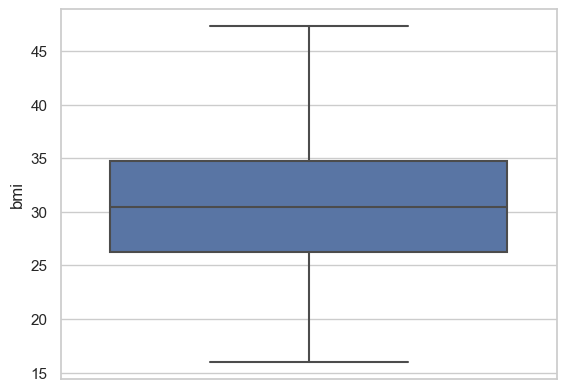

In [28]:
sns.boxplot(y='bmi', data= new_df)
plt.show()

- There are no more outliers

# Feature Scaling

In [29]:
i=5
x = new_df.iloc[:, [col for col in range(new_df.shape[1]) if col != i]]  #this is my independent variables
y= new_df['charges'] 

In [30]:
x.head()

,age,sex,bmi,children,smoker,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,0,0,1
1,18,1,33.770,1,0,0,1,0
2,28,1,33.000,3,0,0,1,0
3,33,1,22.705,0,0,1,0,0
4,32,1,28.880,0,0,1,0,0


In [31]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [32]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
sc_x= sc.fit_transform(x)
pd.DataFrame(sc_x)

,0,1,2,3,4,5,6,7
0,-1.440418,-1.009771,-0.454032,-0.909234,1.969660,-0.565546,-0.611638,1.764609
1,-1.511647,0.990324,0.515033,-0.079442,-0.507702,-0.565546,1.634955,-0.566698
2,-0.799350,0.990324,0.387915,1.580143,-0.507702,-0.565546,1.634955,-0.566698
3,-0.443201,0.990324,-1.311662,-0.909234,-0.507702,1.768203,-0.611638,-0.566698
4,-0.514431,0.990324,-0.292246,-0.909234,-0.507702,1.768203,-0.611638,-0.566698
...,...,...,...,...,...,...,...,...
1332,0.767704,0.990324,0.052787,1.580143,-0.507702,1.768203,-0.611638,-0.566698
1333,-1.511647,-1.009771,0.209621,-0.909234,-0.507702,-0.565546,-0.611638,-0.566698
1334,-1.511647,-1.009771,1.023503,-0.909234,-0.507702,-0.565546,1.634955,-0.566698
1335,-1.297958,-1.009771,-0.800716,-0.909234,-0.507702,-0.565546,-0.611638,1.764609


# HEATMAP Visualization to check the Multi-collinearity
- By visualizing the heatmap we can check corelation between dependent variables and independent variables
- We have to notice two thing
    - if the value is coming more than 0.75 or 0.8 we have to remove that variables
    - if between independent variables two or more values have same value, we have to drop one of them.

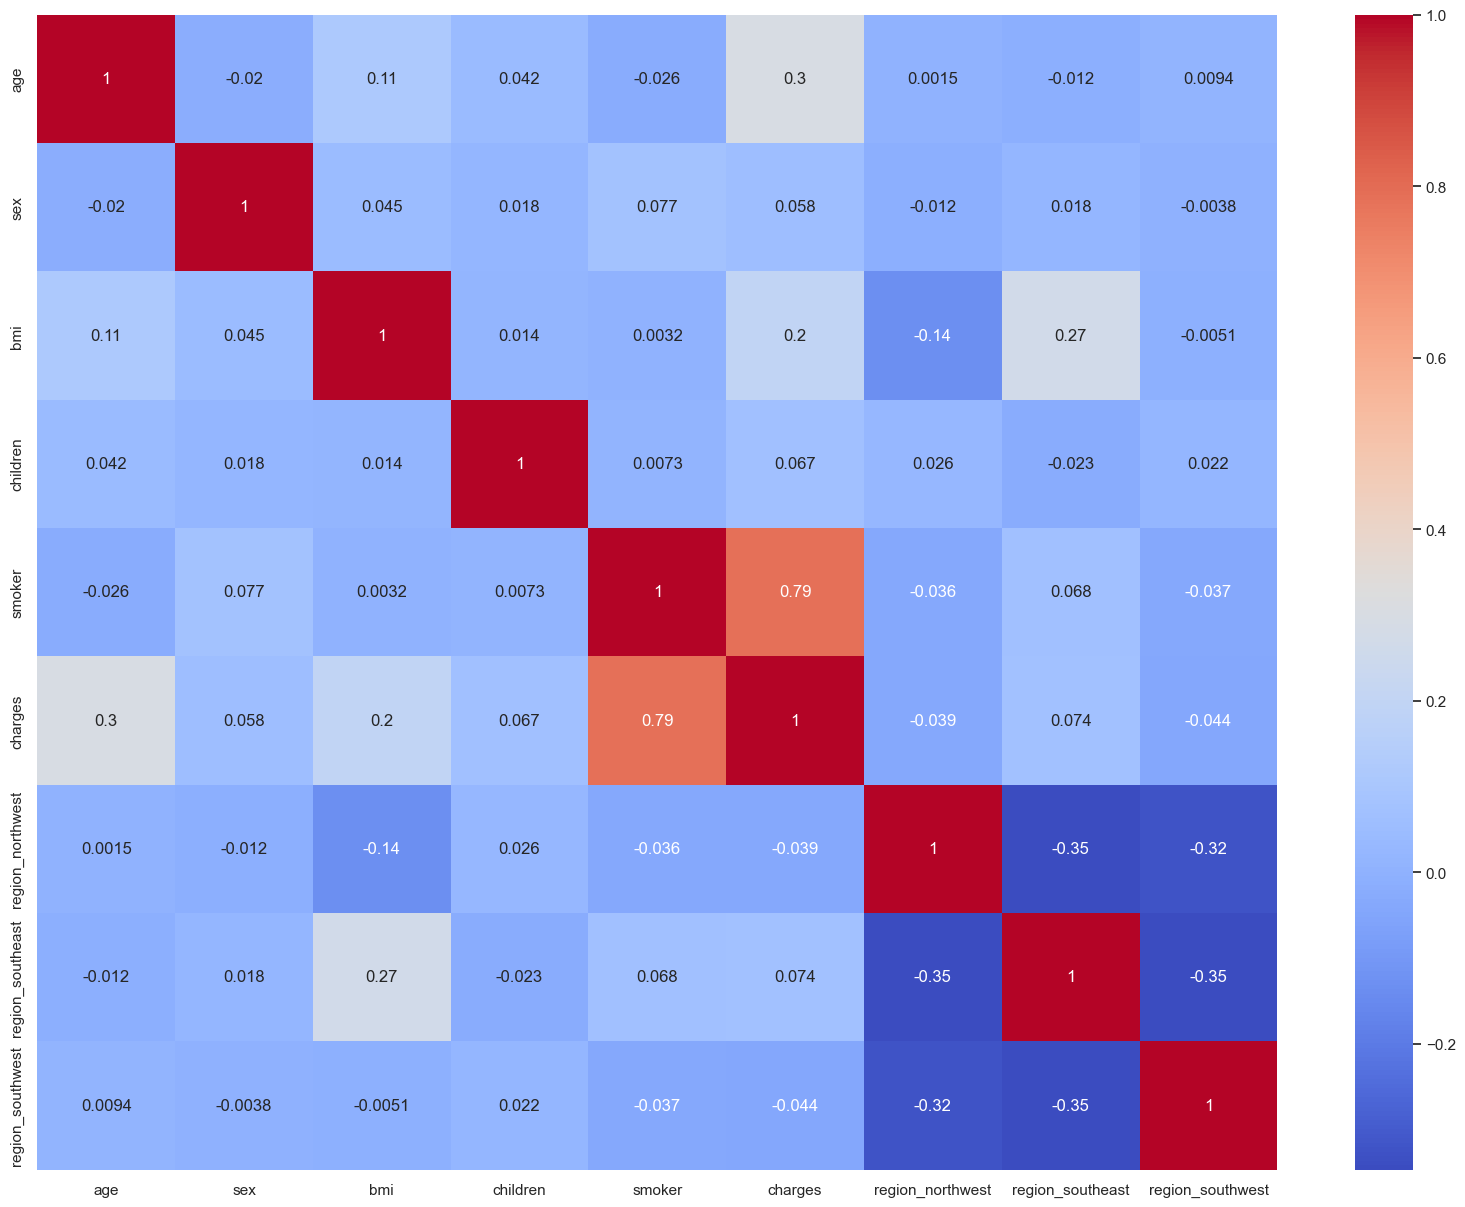

In [33]:
plt.figure(figsize=(20,15))
corr= new_df.corr()
sns.heatmap(corr, annot= True, cmap='coolwarm')
plt.show()

# Variance Inflation Factor- VIF
- One of the stat method to chech the multi-collinearity
- if any feature vif value is greater than 5 then there is a multi-collinearity

In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variable= sc_x

vif= pd.DataFrame()

vif['Variance Inflation Factor'] = [variance_inflation_factor(variable,i) for i in range(variable.shape[1])]

vif['Features']= x.columns

In [35]:
vif

,Variance Inflation Factor,Features
0,1.017435,age
1,1.008800,sex
2,1.106541,bmi
3,1.004040,children
4,1.012110,smoker
5,1.517673,region_northwest
6,1.651039,region_southeast
7,1.529201,region_southwest


In [36]:
# So there is no multi-collinearity

# Split the data into Train and Test 

## Approach-1 (Linear Regression Method)

In [37]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=101)

print(x_train.shape , x_test.shape, y_train.shape, y_test.shape)

(1002, 8) (335, 8) (1002,) (335,)


# Building Linear Regression Model

In [38]:
from sklearn.linear_model import LinearRegression
lm= LinearRegression()
lm.fit(x_train, y_train)

LinearRegression()

### predict the price by using lm model with test dataset

In [39]:
y_pred_price=lm.predict(x_test)
y_pred_price_train=lm.predict(x_train)

### Validate the actual price with the predicted price

In [40]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred_price)

0.7509443198322774

In [41]:
r2_score(y_train,y_pred_price_train)

0.7494256286283418

## Approach-2 (OLS Method)

In [42]:
from statsmodels.regression.linear_model import OLS
import statsmodels.regression.linear_model as smf

In [43]:
reg_model= smf.OLS(endog = y_train , exog = x_train).fit()

In [44]:
reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                charges   R-squared (uncentered):                   0.875
Model:                            OLS   Adj. R-squared (uncentered):              0.874
Method:                 Least Squares   F-statistic:                              867.8
Date:                Wed, 26 Jul 2023   Prob (F-statistic):                        0.00
Time:                        20:25:11   Log-Likelihood:                         -10203.
No. Observations:                1002   AIC:                                  2.042e+04
Df Residuals:                     994   BIC:                                  2.046e+04
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
age                191.4127     13.431     14.251      0.000     165.056     217.769
sex               -462.0753    404.736     -1.142      0.254   -1256.310     332.160
bmi                 79.5710     22.438      3.546      0.000      35.540     123.602
children           307.0506    169.470      1.812      0.070     -25.509     639.610
smoker             2.27e+04    491.602     46.173      0.000    2.17e+04    2.37e+04
region_northwest -1905.5176    569.885     -3.344      0.001   -3023.833    -787.202
region_southeast -1075.0157    599.043     -1.795      0.073   -2250.550     100.519
region_southwest -1910.0682    591.157     -3.231      0.001   -3070.128    -750.009
==============================================================================
Omnibus:                      199.495   Durbin-Watson:                   1.803
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              416.190
Skew:                           1.124   Prob(JB):                     4.22e-91
Kurtosis:                       5.216   Cond. No.                         213.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Approach-3 (Regularization Method)

### Lasso Model

In [45]:
from sklearn.linear_model import Lasso 
lasso = Lasso(alpha=0.1)
lasso.fit(x_train, y_train)
print("Lasso Model :", (lasso.coef_))

Lasso Model : [  247.90454386    42.70282668   354.30666359   475.60461309
 23211.47865099  -417.66679968  -715.35196294  -826.59425113]


In [46]:
y_pred_train_lasso = lasso.predict(x_train)
y_pred_test_lasso = lasso.predict(x_test)

In [47]:
print("Training Accuracy :", r2_score(y_train, y_pred_train_lasso))
print()
print("Test Accuracy :", r2_score(y_test, y_pred_test_lasso))

Training Accuracy : 0.749425624265386

Test Accuracy : 0.750939616420311


### Ridge Model

In [48]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=0.3)
ridge.fit(x_train, y_train)
print("Ridge Model :", (ridge.coef_))

Ridge Model : [  247.89120385    45.73552846   354.19869159   475.93527165
 23170.85496598  -417.16593991  -711.35102432  -825.99100007]


In [49]:
y_pred_train_ridge = ridge.predict(x_train)
y_pred_test_ridge = ridge.predict(x_test)

In [50]:
print("Training Accuracy :", r2_score(y_train, y_pred_train_ridge))
print()
print("Test Accuracy :", r2_score(y_test, y_pred_test_ridge))

Training Accuracy : 0.7494236637733178

Test Accuracy : 0.7507137627091925


### ElasticNet

In [51]:
from sklearn.linear_model import ElasticNet
elastic = ElasticNet(alpha=0.3, l1_ratio=0.1)
elastic.fit(x_train, y_train)

ElasticNet(alpha=0.3, l1_ratio=0.1)

In [52]:
y_pred_train_elastic = elastic.predict(x_train)
y_pred_test_elastic = elastic.predict(x_test)

In [53]:
print("Training Accuracy :", r2_score(y_train, y_pred_train_elastic))
print()
print("Test Accuracy :", r2_score(y_test, y_pred_test_elastic))

Training Accuracy : 0.5143658694292714

Test Accuracy : 0.48133319032716915


## Approach-4 ( Gradient Descent Method)

In [54]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(sc_x, y, test_size=0.25, random_state=101)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(1002, 8) (335, 8) (1002,) (335,)


In [55]:
from sklearn.linear_model import SGDRegressor

In [56]:
gd_model = SGDRegressor()
gd_model.fit(x_train, y_train)

SGDRegressor()

In [57]:
y_pred_gd_train = gd_model.predict(x_train)

y_pred_gd_test = gd_model.predict(x_test)

In [58]:
print("GD Training Accuracy :", r2_score(y_train, y_pred_gd_train))

print()

print("GD Test Accuracy :", r2_score(y_test, y_pred_gd_test))

GD Training Accuracy : 0.7493335101440637

GD Test Accuracy : 0.7489866775885352


# Polynominal Regression Model

In [59]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

In [60]:
poly = PolynomialFeatures()
x_train_trans = poly.fit_transform(x_train)
x_test_trans = poly.fit_transform(x_test)

In [61]:
lr = LinearRegression()
lr.fit(x_train_trans, y_train)

LinearRegression()

In [62]:
y_pred_poly_train = lr.predict(x_train_trans)
y_pred_poly_test = lr.predict(x_test_trans)

In [63]:
print("Poly Training Accuracy :", r2_score(y_train, y_pred_poly_train))

print()

print("Poly Test Accuracy :", r2_score(y_test, y_pred_poly_test))

Poly Training Accuracy : 0.8558617888209539

Poly Test Accuracy : 0.8192166992170076


## Performance matrix

### Mean Absolute Error (MAE)

In [64]:
from sklearn import metrics

In [65]:
print("MAE :", metrics.mean_absolute_error(y_test, y_pred_price))

MAE : 4086.8466832149925


### Mean Absolute Percent Error (MAPE)

In [66]:
print("MAPE :", metrics.mean_absolute_error(y_test, y_pred_price)/100)

MAPE : 40.86846683214993


### Mean Squared Error (MSE)

In [67]:
print("MSE :", metrics.mean_squared_error(y_test, y_pred_price))

MSE : 36535029.98449478


## Root Mean Squared Error (RMSE)

In [68]:
print("RMSE :", np.sqrt(metrics.mean_squared_error(y_test, y_pred_price)))

RMSE : 6044.421393689787


# Random Forest Regression 

In [76]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=200, criterion='poisson', 
                            bootstrap=True, oob_score=False)
rf.fit(x_train, y_train)

RandomForestRegressor(criterion='poisson', n_estimators=200)

In [77]:
y_pred_train_rm = rf.predict(x_train)
y_pred_test_rm = rf.predict(x_test)

In [78]:
print(r2_score(y_train, y_pred_train_rm))
print()
print(r2_score(y_test, y_pred_test_rm))

0.9786041413738815

0.8286032228499688


In [79]:
# Cross Validation approach
from sklearn.model_selection import cross_val_score
training_accuracy = cross_val_score(rf, x_train, y_train, cv=10)
test_accuracy = cross_val_score(rf, x_test, y_test, cv=10)
print(training_accuracy.mean())
print()
print(test_accuracy.mean())

0.839278050236107

0.7760543465940929


# Check linearity

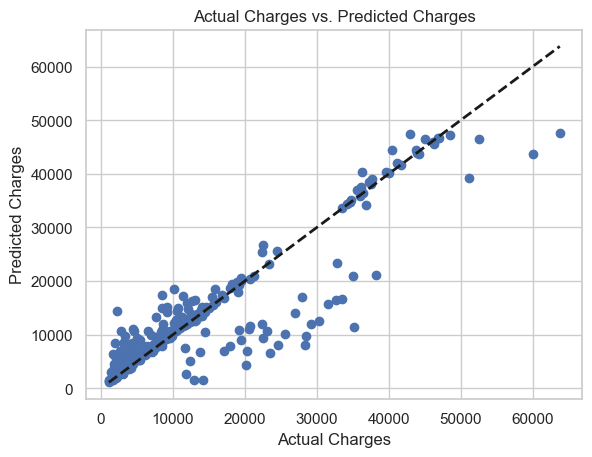

In [80]:
plt.scatter(y_test, y_pred_test_rm)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)  # Linearity curve
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual Charges vs. Predicted Charges')
plt.show()

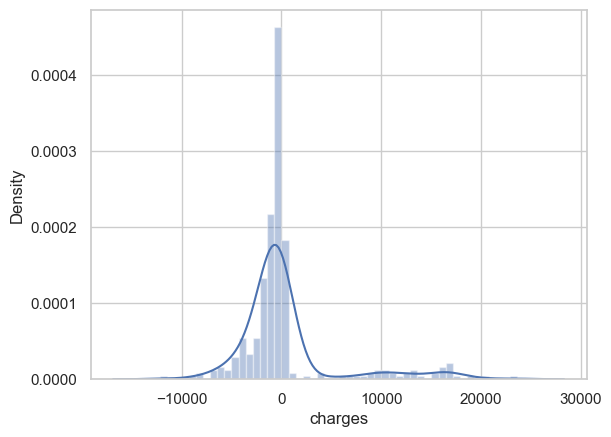

In [81]:
# Normality of Residual

sns.distplot((y_test - y_pred_test_rm), bins=50)
plt.show()

# Conclusion:
- 1) Linearity - **Satisfied**
- 2) Normality of Residuals- **Satisfied**
- 3) Homoscedasticity - **Satisfied (there is no outlier and residual is normaly distributed)**
- 4) No autocorrelation - **Satisfied**
- 5) No or little Multicollinearity - **Satisfied**
- 6) No endogenity problem - **Satisfied** 